In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

c:\Users\HP\Desktop\agents\venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [3]:
load_dotenv()

model = ChatOpenAI()

In [4]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

In [6]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [7]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [8]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

In [9]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state['outline'])

I. Introduction
    A. Brief overview of AI
    B. Explanation of the rise of AI globally
    C. Preview of how AI is making an impact in India

II. History of AI in India
    A. Early adoption of AI technologies in research institutions
    B. Growth of AI startups in India
    C. Government initiatives to promote AI development

III. Inclusion of AI in various industries in India
    A. Healthcare
        1. Use of AI in diagnostics and treatment
        2. Development of AI-powered medical devices
    B. Finance
        1. AI for fraud detection and risk management
        2. AI-powered chatbots for customer service
    C. Education
        1. AI for personalized learning experiences
        2. Use of AI for student assessments and feedback

IV. Challenges and opportunities in the rise of AI in India
    A. Skills gap in AI expertise
    B. Ethical concerns surrounding AI
    C. Opportunities for job creation and economic growth
    D. Potential for AI to address societal challenges

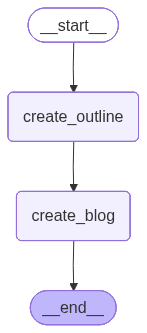

In [10]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())